# Quantization Experiement CaffeNet 
Simple setup first and run floating point simulation.

In [ ]:
# global setup 
import sim_caffenet
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline
import scipy.io as io
result_dir = './experiment_results/'
import collections
import cPickle as pickle

# run 1000 images from validation dataset
iterations = 20
batch_size = 50
LMDB_filename = '/media/jingyang/0E3519FE0E3519FE/ilsvrc12_val_lmdb/'

# run floating point CaffeNet (ground truth)
# so that we can get the range, and ground truth accuracy
floating_point_accuracy, floating_point_blobs_range, floating_point_weights_range, \
    floating_point_biases_range, kernels_name = \
    sim_caffenet.sim_floating_point_caffenet(LMDB_filename, batch_size=batch_size, 
                                             iterations=iterations, verbose=False)

# save the experiment results 
io.savemat(result_dir+'floating_point_acc.mat', dict(acc=floating_point_accuracy)) 

print 'Ground Truth (floating point): Top1 Acc: %f; Top5 Acc: %f' % (floating_point_accuracy[0].mean(), 
                                                                    floating_point_accuracy[1].mean())

Floating point CaffNet starts inference...
Batch 0/20: Top-1 Acc: 66.00%, Top-5 Acc: 78.00%
Batch 10/20: Top-1 Acc: 52.00%, Top-5 Acc: 70.00%
Ground Truth (floating point): Top1 Acc: 0.583000; Top5 Acc: 0.780000


## 1. Uniform quantization scheme
In this exploration, weights, biases, blobs share the same quantization scheme. We will adopt 2 different quantization schemes: aggressive and conservative respectively.

In [2]:
uniform_bit_width = range(5, 17) # 5 - 16

# conservative floor strategy
round_method = 'FLOOR' # round method 
round_strategy = 'CONSERVATIVE' # round strategy
conservative_floor_uniform_accuracy = collections.OrderedDict()
for b in uniform_bit_width:
    print 'Simulate conservative + floor uniform bit %d...' % (b,)
    bit_width=dict(blobs=b, weights=b, biases=b) # uniform bit width
    conservative_floor_uniform_accuracy[b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)
# save the experiment results 
io.savemat(result_dir+'conservative_floor_uniform_acc.mat', dict(bit_width=conservative_floor_uniform_accuracy.keys(),
                                                          acc=conservative_floor_uniform_accuracy.values()))

# conservative round strategy
round_method = 'ROUND' # round method 
round_strategy = 'CONSERVATIVE' # round strategy
conservative_round_uniform_accuracy = collections.OrderedDict()
for b in uniform_bit_width:
    print 'Simulate conservative + round uniform bit %d...' % (b,)
    bit_width=dict(blobs=b, weights=b, biases=b) # uniform bit width
    conservative_round_uniform_accuracy[b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)
# save the experiment results 
io.savemat(result_dir+'conservative_round_uniform_acc.mat', dict(bit_width=conservative_round_uniform_accuracy.keys(),
                                                          acc=conservative_round_uniform_accuracy.values()))


# aggressive floor strategy
round_method = 'floor' # round method 
round_strategy = 'AGGRESSIVE' # round strategy
aggressive_floor_uniform_accuracy = collections.OrderedDict()
for b in uniform_bit_width:
    print 'Simulate aggressive + floor uniform bit %d...' % (b,)
    bit_width=dict(blobs=b, weights=b, biases=b) # uniform bit width
    aggressive_floor_uniform_accuracy[b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)
      
# save the experiment results 
io.savemat(result_dir+'aggressive_floor_uniform_acc.mat', dict(bit_width=aggressive_floor_uniform_accuracy.keys(),
                                                          acc=aggressive_floor_uniform_accuracy.values()))

# aggressive round strategy
round_method = 'ROUND' # round method 
round_strategy = 'AGGRESSIVE' # round strategy
aggressive_round_uniform_accuracy = collections.OrderedDict()
for b in uniform_bit_width:
    print 'Simulate aggressive + round uniform bit %d...' % (b,)
    bit_width=dict(blobs=b, weights=b, biases=b) # uniform bit width
    aggressive_round_uniform_accuracy[b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)
      
# save the experiment results 
io.savemat(result_dir+'aggressive_round_uniform_acc.mat', dict(bit_width=aggressive_round_uniform_accuracy.keys(),
                                                          acc=aggressive_round_uniform_accuracy.values()))

Simulate conservative + floor uniform bit 5...
Fixed point CaffeNet starts inference...
Batch 0/20: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 10/20: Top-1 Acc: 0.00%, Top-5 Acc: 2.00%
Simulate conservative + floor uniform bit 6...
Fixed point CaffeNet starts inference...
Batch 0/20: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 10/20: Top-1 Acc: 0.00%, Top-5 Acc: 2.00%
Simulate conservative + floor uniform bit 7...
Fixed point CaffeNet starts inference...
Batch 0/20: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 10/20: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Simulate conservative + floor uniform bit 8...
Fixed point CaffeNet starts inference...
Batch 0/20: Top-1 Acc: 4.00%, Top-5 Acc: 14.00%
Batch 10/20: Top-1 Acc: 8.00%, Top-5 Acc: 12.00%
Simulate conservative + floor uniform bit 9...
Fixed point CaffeNet starts inference...
Batch 0/20: Top-1 Acc: 32.00%, Top-5 Acc: 64.00%
Batch 10/20: Top-1 Acc: 38.00%, Top-5 Acc: 68.00%
Simulate conservative + floor uniform bit 10...
Fixed point CaffeNet starts inf

- Plot the diagram Top1 Error Rate and Top5 Error Rate

Ground Truth (floating point): Top1 Acc: 0.583000; Top5 Acc: 0.780000


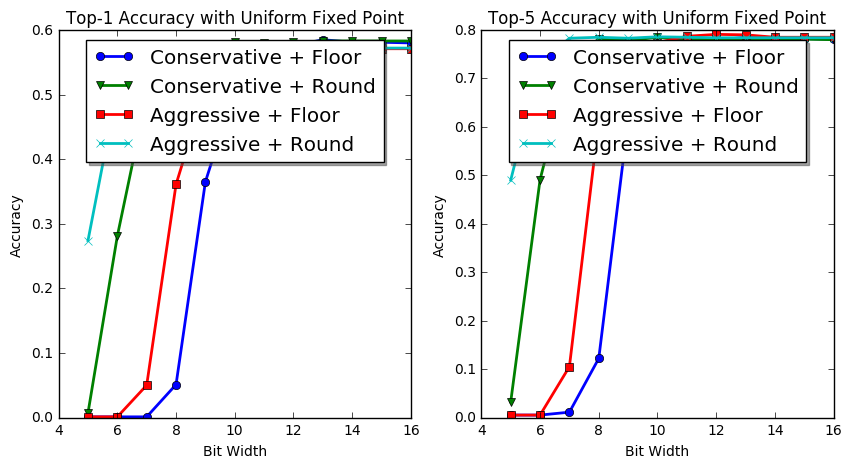

In [4]:
print 'Ground Truth (floating point): Top1 Acc: %f; Top5 Acc: %f' % (floating_point_accuracy[0].mean(), 
                                                                    floating_point_accuracy[1].mean())
plt.figure(figsize=(10, 5))
## Top1
plt.subplot(1, 2, 1)
plt.plot(uniform_bit_width, [conservative_floor_uniform_accuracy[b][0].mean() for b in uniform_bit_width], 'o-',
         linewidth=2, label='Conservative + Floor')
plt.plot(uniform_bit_width, [conservative_round_uniform_accuracy[b][0].mean() for b in uniform_bit_width], 'v-',
         linewidth=2, label='Conservative + Round')
plt.plot(uniform_bit_width, [aggressive_floor_uniform_accuracy[b][0].mean() for b in uniform_bit_width], 's-',
         linewidth=2, label='Aggressive + Floor')
plt.plot(uniform_bit_width, [aggressive_round_uniform_accuracy[b][0].mean() for b in uniform_bit_width], 'x-',
        linewidth=2, label='Aggressive + Round')
plt.title('Top-1 Accuracy with Uniform Fixed Point')
plt.xlabel('Bit Width')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

## Top5
plt.subplot(1, 2, 2)
plt.plot(uniform_bit_width, [conservative_floor_uniform_accuracy[b][1].mean() for b in uniform_bit_width], 'o-',
         linewidth=2, label='Conservative + Floor')
plt.plot(uniform_bit_width, [conservative_round_uniform_accuracy[b][1].mean() for b in uniform_bit_width], 'v-',
         linewidth=2, label='Conservative + Round')
plt.plot(uniform_bit_width, [aggressive_floor_uniform_accuracy[b][1].mean() for b in uniform_bit_width], 's-',
         linewidth=2, label='Aggressive + Floor')
plt.plot(uniform_bit_width, [aggressive_round_uniform_accuracy[b][1].mean() for b in uniform_bit_width], 'x-',
        linewidth=2, label='Aggressive + Round')
plt.title('Top-5 Accuracy with Uniform Fixed Point')
plt.xlabel('Bit Width')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

## 2. Explore the weights and biases quantization impact
The kernels (weights and biases) affect the final storage on the chip.

In [2]:
iterations = 20
batch_size = 50

blobs_bit_width = 16
kernels_bit_width = range(4, 17) # 4 ~ 16

# conservative floor strategy
round_method = 'FLOOR' # round method 
round_strategy = 'CONSERVATIVE' # round strategy
conservative_floor_kernels_accuracy = collections.OrderedDict()
for b in kernels_bit_width:
    print 'Simulate conservative floor kernels bit %d with blob bit %d...' % (b, blobs_bit_width)
    bit_width=dict(blobs=blobs_bit_width, weights=b, biases=b) # kernel bit width
    conservative_floor_kernels_accuracy[b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)
# save the experiment results 
io.savemat(result_dir+'conservative_floor_kernels_acc.mat', dict(bit_width=conservative_floor_kernels_accuracy.keys(),
                                                          acc=conservative_floor_kernels_accuracy.values()))

# conservative round strategy
round_method = 'ROUND' # round method 
round_strategy = 'CONSERVATIVE' # round strategy
conservative_round_kernels_accuracy = collections.OrderedDict()
for b in kernels_bit_width:
    print 'Simulate conservative round kernels bit %d with blob bit %d...' % (b, blobs_bit_width)
    bit_width=dict(blobs=blobs_bit_width, weights=b, biases=b) # kernel bit width
    conservative_round_kernels_accuracy[b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)
# save the experiment results 
io.savemat(result_dir+'conservative_round_kernels_acc.mat', dict(bit_width=conservative_round_kernels_accuracy.keys(),
                                                          acc=conservative_round_kernels_accuracy.values()))
   
# aggressive floor strategy
round_method = 'FLOOR' # round method 
round_strategy = 'AGGRESSIVE' # round strategy
aggressive_floor_kernels_accuracy = collections.OrderedDict()
for b in kernels_bit_width:
    print 'Simulate aggressive floor kernels bit %d with blob bit %d...' % (b, blobs_bit_width)
    bit_width=dict(blobs=blobs_bit_width, weights=b, biases=b) # kernel bit width
    aggressive_floor_kernels_accuracy[b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)    
    
# save the experiment results 
io.savemat(result_dir+'aggressive_floor_kernels_acc.mat', dict(bit_width=aggressive_floor_kernels_accuracy.keys(),
                                                          acc=aggressive_floor_kernels_accuracy.values()))    
    
# aggressive round strategy
round_method = 'ROUND' # round method 
round_strategy = 'AGGRESSIVE' # round strategy
aggressive_round_kernels_accuracy = collections.OrderedDict()
for b in kernels_bit_width:
    print 'Simulate aggressive round kernels bit %d with blob bit %d...' % (b, blobs_bit_width)
    bit_width=dict(blobs=blobs_bit_width, weights=b, biases=b) # kernel bit width
    aggressive_round_kernels_accuracy[b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)    
    
# save the experiment results 
io.savemat(result_dir+'aggressive_round_kernels_acc.mat', dict(bit_width=aggressive_round_kernels_accuracy.keys(),
                                                          acc=aggressive_round_kernels_accuracy.values()))

Simulate conservative floor kernels bit 4 with blob bit 16...
Fixed point CaffeNet starts inference...
Batch 0/20: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 10/20: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Simulate conservative floor kernels bit 5 with blob bit 16...
Fixed point CaffeNet starts inference...
Batch 0/20: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 10/20: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Simulate conservative floor kernels bit 6 with blob bit 16...
Fixed point CaffeNet starts inference...
Batch 0/20: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 10/20: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Simulate conservative floor kernels bit 7 with blob bit 16...
Fixed point CaffeNet starts inference...
Batch 0/20: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 10/20: Top-1 Acc: 0.00%, Top-5 Acc: 2.00%
Simulate conservative floor kernels bit 8 with blob bit 16...
Fixed point CaffeNet starts inference...
Batch 0/20: Top-1 Acc: 8.00%, Top-5 Acc: 18.00%
Batch 10/20: Top-1 Acc: 12.00%, Top-5 Acc: 20.00%
Simulat

Ground Truth (floating point): Top1 Acc: 0.583000; Top5 Acc: 0.780000


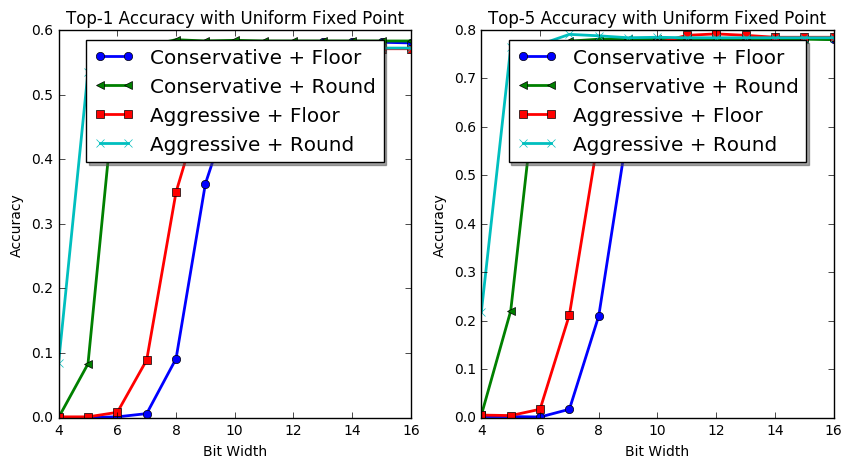

In [3]:
print 'Ground Truth (floating point): Top1 Acc: %f; Top5 Acc: %f' % (floating_point_accuracy[0].mean(), 
                                                                    floating_point_accuracy[1].mean())
plt.figure(figsize=(10, 5))
## Top1
plt.subplot(1, 2, 1)
plt.plot(kernels_bit_width, [conservative_floor_kernels_accuracy[b][0].mean() for b in kernels_bit_width], 'o-',
         linewidth=2, label='Conservative + Floor')
plt.plot(kernels_bit_width, [conservative_round_kernels_accuracy[b][0].mean() for b in kernels_bit_width], '<-',
         linewidth=2, label='Conservative + Round')
plt.plot(kernels_bit_width, [aggressive_floor_kernels_accuracy[b][0].mean() for b in kernels_bit_width], 's-',
        linewidth=2, label='Aggressive + Floor')
plt.plot(kernels_bit_width, [aggressive_round_kernels_accuracy[b][0].mean() for b in kernels_bit_width], 'x-',
        linewidth=2, label='Aggressive + Round')
plt.title('Top-1 Accuracy with Uniform Fixed Point')
plt.xlabel('Bit Width')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

## Top5
plt.subplot(1, 2, 2)
plt.plot(kernels_bit_width, [conservative_floor_kernels_accuracy[b][1].mean() for b in kernels_bit_width], 'o-',
         linewidth=2, label='Conservative + Floor')
plt.plot(kernels_bit_width, [conservative_round_kernels_accuracy[b][1].mean() for b in kernels_bit_width], '<-',
         linewidth=2, label='Conservative + Round')
plt.plot(kernels_bit_width, [aggressive_floor_kernels_accuracy[b][1].mean() for b in kernels_bit_width], 's-',
        linewidth=2, label='Aggressive + Floor')
plt.plot(kernels_bit_width, [aggressive_round_kernels_accuracy[b][1].mean() for b in kernels_bit_width], 'x-',
        linewidth=2, label='Aggressive + Round')
plt.title('Top-5 Accuracy with Uniform Fixed Point')
plt.xlabel('Bit Width')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

## 3. Explore the sensitivity of different layers
In this experiement, we will change the kernel width individually. We will see how the final prediction accuracy varies.

In [ ]:
blobs_bit_width = 16
sensitive_kernel_bit_width = range(3, 17) # 3 ~ 16
default_kernel_bit_width = 16

# default kernel bit width
default_kernel = collections.OrderedDict();
for k in kernels_name:
    default_kernel[k] = default_kernel_bit_width

# optimal rounding strategy
round_method = 'ROUND' # round method 
round_strategy = 'AGGRESSIVE' # round strategy
optimal_senstive_accuracy = collections.OrderedDict()
for k in kernels_name:
    optimal_senstive_accuracy[k] = collections.OrderedDict()
    for b in sensitive_kernel_bit_width:
        print 'Simulate aggressive kernels[%s] bit %d with blob bit %d...' % (k, b, blobs_bit_width)
        cur_kernel_bit_width = default_kernel.copy()
        cur_kernel_bit_width[k] = b
        print cur_kernel_bit_width
        bit_width=dict(blobs=blobs_bit_width, weights=cur_kernel_bit_width, biases=cur_kernel_bit_width) # kernel bit width
        optimal_senstive_accuracy[k][b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                            blobs_range=floating_point_blobs_range, \
                                             weights_range=floating_point_weights_range, \
                                              biases_range=floating_point_biases_range, batch_size=batch_size, \
                                              iterations=iterations, round_method=round_method, \
                                                round_strategy=round_strategy, verbose=False)
        
# save experiements
pickle.dump(optimal_senstive_accuracy, open(result_dir+'optimal_sensitive_acc.p', 'wb'))
## load method
#load_optimal_senstive_accuracy = pickle.load(open(result_dir+'optimal_sensitive_acc.p', 'rb')) 

Simulate aggressive kernels[conv1] bit 3 with blob bit 16...
OrderedDict([('conv1', 3), ('conv2', 16), ('conv3', 16), ('conv4', 16), ('conv5', 16), ('fc6', 16), ('fc7', 16), ('fc8', 16)])
Fixed point CaffeNet starts inference...
Batch 0/20: Top-1 Acc: 0.00%, Top-5 Acc: 14.00%
Batch 10/20: Top-1 Acc: 4.00%, Top-5 Acc: 8.00%
Simulate aggressive kernels[conv1] bit 4 with blob bit 16...
OrderedDict([('conv1', 4), ('conv2', 16), ('conv3', 16), ('conv4', 16), ('conv5', 16), ('fc6', 16), ('fc7', 16), ('fc8', 16)])


- Print the accuracy results

In [5]:
print 'Optimal sensitive analysis'
for k, v in optimal_senstive_accuracy.items():
    for bw, acc in v.items():
        print 'kernel[%s] @ bw = %d: top1 = %f; top5 = %f' % \
            (k, bw, acc.mean(axis=1)[0], acc.mean(axis=1)[1])

Optimal sensitive analysis
kernel[conv1] @ bw = 4: top1 = 0.546000; top5 = 0.765000
kernel[conv1] @ bw = 5: top1 = 0.570000; top5 = 0.779000
kernel[conv2] @ bw = 4: top1 = 0.543000; top5 = 0.770000
kernel[conv2] @ bw = 5: top1 = 0.569000; top5 = 0.780000
kernel[conv3] @ bw = 4: top1 = 0.152000; top5 = 0.322000
kernel[conv3] @ bw = 5: top1 = 0.553000; top5 = 0.773000
kernel[conv4] @ bw = 4: top1 = 0.567000; top5 = 0.770000
kernel[conv4] @ bw = 5: top1 = 0.569000; top5 = 0.787000
kernel[conv5] @ bw = 4: top1 = 0.560000; top5 = 0.781000
kernel[conv5] @ bw = 5: top1 = 0.575000; top5 = 0.785000
kernel[fc6] @ bw = 4: top1 = 0.567000; top5 = 0.786000
kernel[fc6] @ bw = 5: top1 = 0.569000; top5 = 0.783000
kernel[fc7] @ bw = 4: top1 = 0.568000; top5 = 0.787000
kernel[fc7] @ bw = 5: top1 = 0.569000; top5 = 0.788000
kernel[fc8] @ bw = 4: top1 = 0.574000; top5 = 0.783000
kernel[fc8] @ bw = 5: top1 = 0.574000; top5 = 0.789000
